
**Project Title: Predicting Restaurant Ratings using Zomato Bangalore Dataset**

**Problem Description**

Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The task is to  creating a predictive model that can accurately predict the ratings of restaurants in Bangalore, India based on various features available in the Zomato Bangalore dataset. Zomato is a popular online restaurant discovery platform that provides information about restaurants, their menus, user reviews, and ratings. The dataset you will be working with contains information about thousands of restaurants in Bangalore, including attributes such as location, cuisine type, cost for two, user rating and others.



**Problem Statement**

In a world where dining experiences are increasingly influenced by online reviews and ratings, understanding and predicting the success of restaurants has become crucial for both consumers and business owners alike. With this in mind, I embarked on a journey to develop a predictive model that can anticipate the ratings of restaurants based on various factors.

**Import Libraries**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")



**Load Data**

In [62]:
df = pd.read_csv("zomato.csv")


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [63]:
# print the head of data
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [64]:
#print tail of the dataset
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [65]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [66]:
df.shape

(51717, 17)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Observation
       
       Rate, dish_liked, phone , approx_cost(for two people) values are missing.

In [68]:
df.votes.describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

* Minimum votes value is 0, can be interpreted as there are some restaurants which have 0 votes
* Maximum votes value is 16832, there is a restaurant which has 16832.
* Average votes value is 284

In [69]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


##Columns description
* url: contains the url of the restaurant in the zomato website

* address: contains the address of the restaurant in Bengaluru

* name: contains the name of the restaurant

* online_order: whether online ordering is available in the restaurant or not

* book_table: table book option available or not

* rate: contains the overall rating of the restaurant out of 5

* votes: contains total number of votes for the restaurant as of the above mentioned date

* phone: contains the phone number of the restaurant

* location: contains the neighborhood in which the restaurant is located

* rest_type: restaurant type

* dish_liked: dishes people liked in the restaurant

* cuisines: food styles, separated by comma

* approx_cost(for two people): contains the approximate cost for meal for two people

* reviews_list: list of tuples containing reviews for the restaurant, each tuple

* menu_item: contains list of menus available in the restaurant

* listed_in(type): type of meal

* listed_in(city): contains the neighborhood in which the restaurant is listed

**DATA PREPROCESSING**

Adjust column names and dropped irrelevant columns

In [70]:
df.loc[:,['url','phone','name','location','address', 'listed_in(city)']].sample(10)

,url,phone,name,location,address,listed_in(city)
32481,https://www.zomato.com/bangalore/delite-chaat-...,080 49652649,Delite Chaat House,Koramangala 6th Block,"18-30, 60 Feet Road, 6th Block, Koramangala, B...",Koramangala 6th Block
37581,https://www.zomato.com/bangalore/barcode-koram...,080 41140234\n+91 9071190190,Barcode,Koramangala 4th Block,"3rd Floor, 100 Feet Road, Near BDA complex, Ko...",Koramangala 7th Block
12757,https://www.zomato.com/bangalore/saatvikk-brig...,+91 8041216902,Saatvikk,Brigade Road,"9, First floor, Curzon Complex, Brigade Road, ...",Church Street
48738,https://www.zomato.com/bangalore/kung-foods-co...,+91 9886120053,Kung Foods,Commercial Street,"2nd Floor, Commerical Plaza, Tasker Town, Comm...",Residency Road
40209,https://www.zomato.com/bangalore/the-higher-ta...,080 42068110\n+91 9343157949,The Higher Taste Stores,Malleshwaram,"250, 17th Cross, Sampige Road, Malleshwaram, B...",Malleshwaram
29089,https://www.zomato.com/bangalore/desi-vdesi-bt...,+91 9739990932\r\r\n+91 9880733916,Desi Vdesi,BTM,"15, SG Palya Main Road, Near Srinivasa Theater...",Koramangala 4th Block
36371,https://www.zomato.com/bangalore/the-duke-of-j...,080 43334321,The Duke of Juices,HSR,"14th Main, 4th Sector, HSR, Bangalore",Koramangala 7th Block
34660,https://www.zomato.com/bangalore/prawn-crunch-...,+91 7899093022,Prawn Crunch,BTM,"Number 7, 20th Main, BTM 1st Stage, Gangotri C...",Koramangala 6th Block
45807,https://www.zomato.com/SmokeHouseDeli-Indirana...,080 25200898\n080 25200899,Smoke House Deli,Indiranagar,"1209, 100 Feet Road, Opposite Apollo Clinic, I...",Old Airport Road
13888,https://www.zomato.com/bangalore/the-us-burger...,+91 7022636871,The US Burger,Electronic City,"Opposite Concorde Manhatton, Neeladri Nagar, P...",Electronic City



Here, we can see that 3 columns are representing same information, so just dropping column which are not important.

we are going to keep the location column and drop the address and listed_in(city) columns
columns url , phone , we are not interested in ,to be dropped too

In [71]:
drop_col=['url','phone','address', 'listed_in(city)']
df.drop(drop_col,axis=1,inplace=True)

In [72]:
df.duplicated().sum()

9809

In [73]:
df.drop_duplicates(inplace=True)

In [74]:
#finding missing percentage
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

##Observation:
* We can observe that 48% dish_liked is missing as well as 10% rate values are missing.
* If we drop everything out, we will lose more than 55% points.

In [75]:
d=df.rate
#lets examine rate column
d.value_counts()

rate
3.9/5     1858
3.7/5     1711
3.8/5     1703
3.9 /5    1663
NEW       1593
          ... 
2.0 /5       6
2.2 /5       5
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [76]:
d.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

There are some points which has 'NEW' rating and '-' rating, which is completely incorrect.

In [77]:
d=d.replace('NEW',np.nan)
d=d.replace('-',np.nan)

In [78]:
df['rate']=d.str.replace(r'/5| /5', '')

In [79]:
d.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [80]:
#if we look closely at the reviews_list data we can clearly see that it has rating values
df.reviews_list.values[:10]

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [81]:
#we could extract these values from reviews and take their mean to fill rate column
df.reviews_list.values[1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

In [82]:
type(df.reviews_list[0])

str

In [85]:
import ast
ast.literal_eval(df.reviews_list.values[1])
df.reviews_list=df.reviews_list.apply(lambda x: ast.literal_eval(x))
df.reviews_list[0][0][0].split()[0]
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)


In [86]:
df['rate_new']=df.reviews_list.apply(lambda x: extract_features_from_review_list(x))

In [87]:
df.loc[:,['rate','rate_new']].sample(10)

,rate,rate_new
29320,4.1 /5,3.9
26624,4.3/5,3.9
10649,3.3/5,NaN
46070,4.2 /5,4.0
22159,3.6/5,2.6
33917,4.4 /5,4.6
41798,3.5 /5,3.0
39438,3.7 /5,3.2
45139,3.1 /5,3.0
50547,3.7 /5,NaN


In [88]:
# apply the changes
nan_index = df.query('rate != rate & rate_new == rate_new').index
for i in nan_index:
    df.loc[i,'rate'] = df.loc[i,'rate_new']

In [89]:
((df.rate.isna().sum()/df.shape[0])*100).round(2)

11.6

We have saved more than 1000 points.

In [90]:
df.drop('rate_new',axis=1,inplace=True)

In [ ]:
def fix_rate(r):
    if "/" in r :
        return float(r[0:3])
    else:
        return np.nan

In [91]:
df["rate"] = df['rate'].astype(str).apply(fix_rate)

In [92]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [94]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [95]:
#converting to float
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).apply(lambda r : float(r.replace(",", "")) )

In [96]:
df.rename(columns={'listed_in(type)':'type','approx_cost(for two people)':'cost'},inplace=True)

In [97]:
df.drop(['name','reviews_list','menu_item','dish_liked'],axis=1,inplace=True)

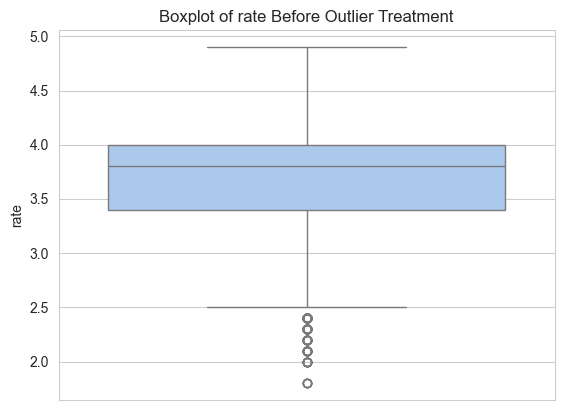

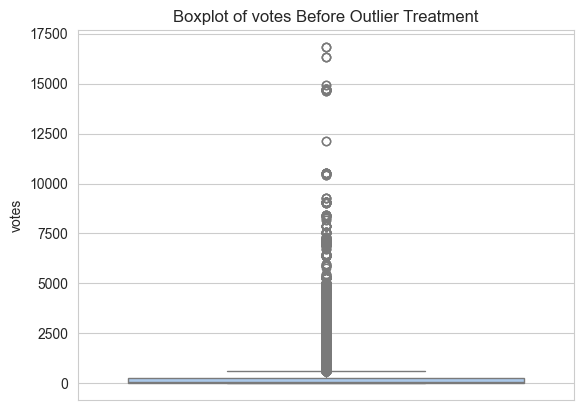

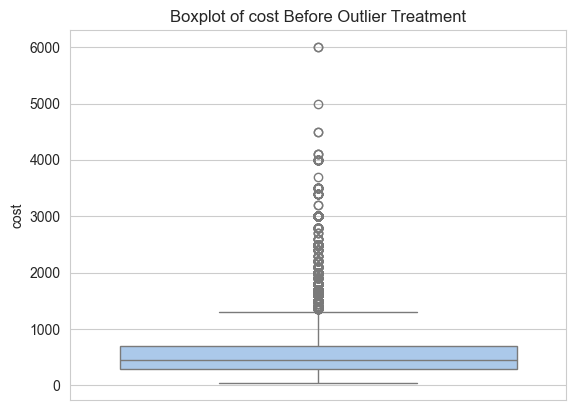

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...
41903,No,No,3.6,27.0,Whitefield,Bar,Continental,1500.0,Pubs and bars
41904,No,No,NaN,0.0,Whitefield,Bar,Finger Food,600.0,Pubs and bars
41905,No,No,NaN,0.0,Whitefield,Bar,Finger Food,1500.0,Pubs and bars
41906,No,Yes,4.3,236.0,"ITPL Main Road, Whitefield",Bar,Finger Food,1500.0,Pubs and bars


In [98]:
# Extract numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
# Visualize numerical data before outlier treatment
for column in numerical_columns:
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column} Before Outlier Treatment")
    plt.show()

# Identify outliers using z-score for numerical columns
def identify_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return z_scores.abs() > threshold

# Treat outliers using winsorization for numerical columns
def treat_outliers_winsorization(data, lower_percentile=5, upper_percentile=95):
    lower_bound = data.quantile(lower_percentile / 100)
    upper_bound = data.quantile(upper_percentile / 100)
    return data.clip(lower_bound, upper_bound)

# Apply outlier treatment for numerical columns
for column in numerical_columns:
    outliers_zscore = identify_outliers_zscore(df[column])
    df[column] = treat_outliers_winsorization(df[column])
df.reset_index(drop=True,inplace=False)    

In [99]:
df.isna().sum()

online_order       0
book_table         0
rate            5914
votes              0
location          14
rest_type        172
cuisines          36
cost             253
type               0
dtype: int64

In [100]:
df['rest_type']=df["rest_type"].fillna(df["rest_type"].mode()[0])
df['cuisines']=df["cuisines"].fillna(df["cuisines"].mode()[0])
df['location']=df["location"].fillna(df["location"].mode()[0])
df['rate']=df["rate"].fillna(df["rate"].mean())
df['cost']=df["cost"].fillna(df["cost"].mean())

In [101]:
def create_target(r):
    if r >= 3.75:
        return "Good"
    else :
        return 'Bad'

In [102]:
df["Target"] =df["rate"].apply(create_target)

In [103]:
df.Target.unique()

array(['Good', 'Bad'], dtype=object)

**EDA**


The Target value count

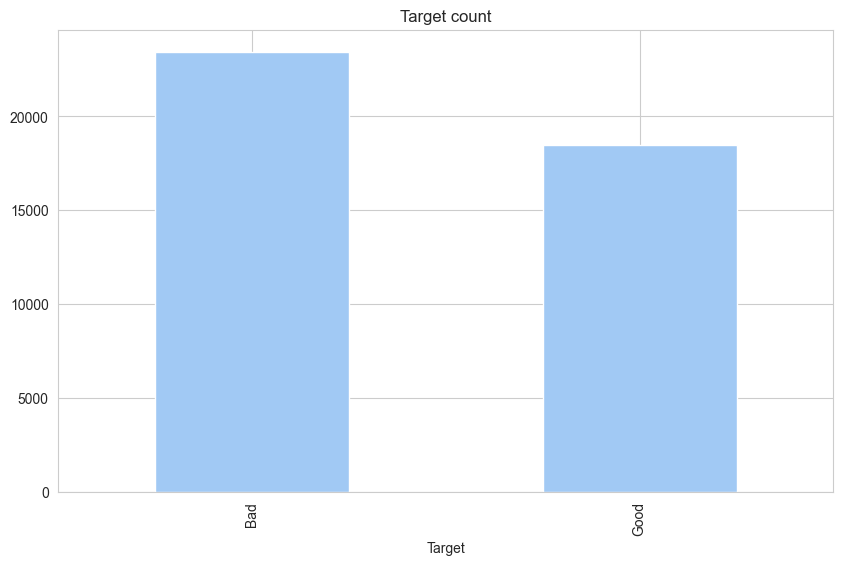

In [104]:
tt=df.Target.value_counts()
plt.figure(figsize=(10,6))
tt.plot(kind='bar')
plt.title('Target count')
plt.show()


How many Restaurant accepting online orders?

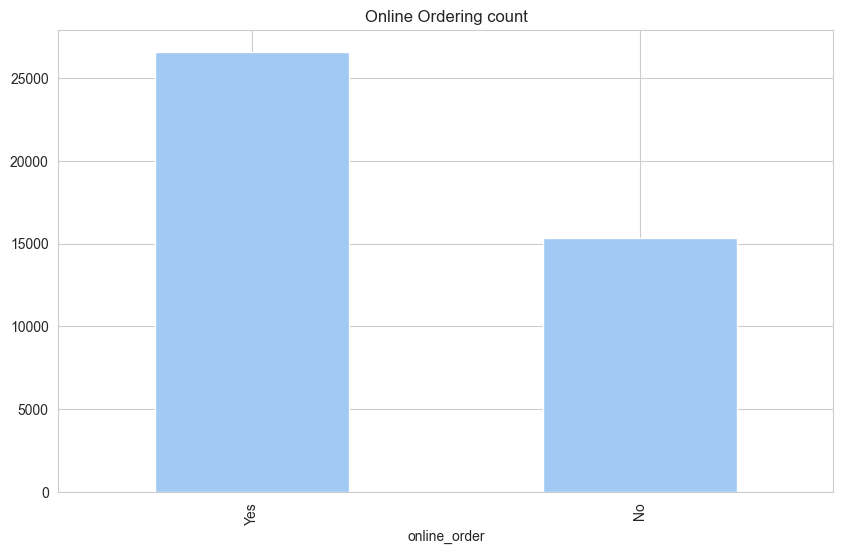

online_order
Yes    26566
No     15342
Name: count, dtype: int64

In [105]:
oo=df.online_order.value_counts()
plt.figure(figsize=(10,6))
oo.plot(kind='bar')
plt.title('Online Ordering count')
plt.show()
oo

 What is distrubution of 'Rate column'?

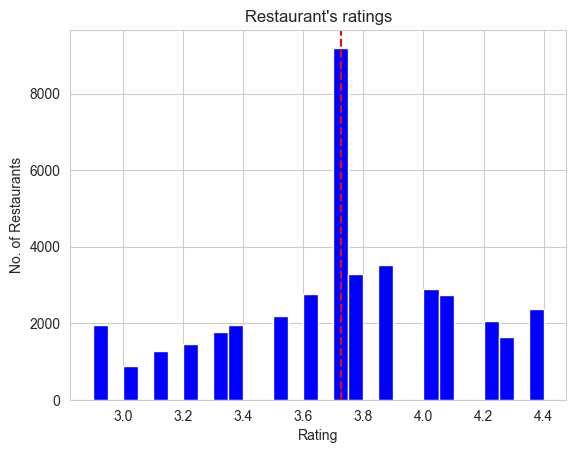

3.7268767016725004


In [106]:
df.rate.hist(color='blue',bins=30)
plt.axvline(x=df.rate.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()
print(df.rate.mean())

How many Restaurants has book table options

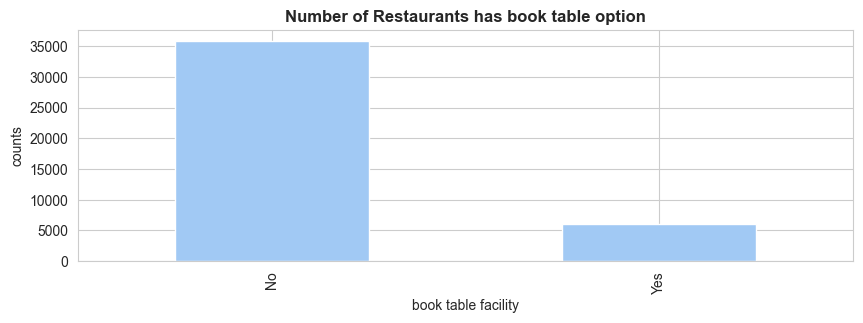

In [107]:
plt.figure(figsize=(10,3))
ax =df.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')
plt.show()

Most restaurants do not have book a table option

In Bangalore city,in which area has maximum number of restaurants

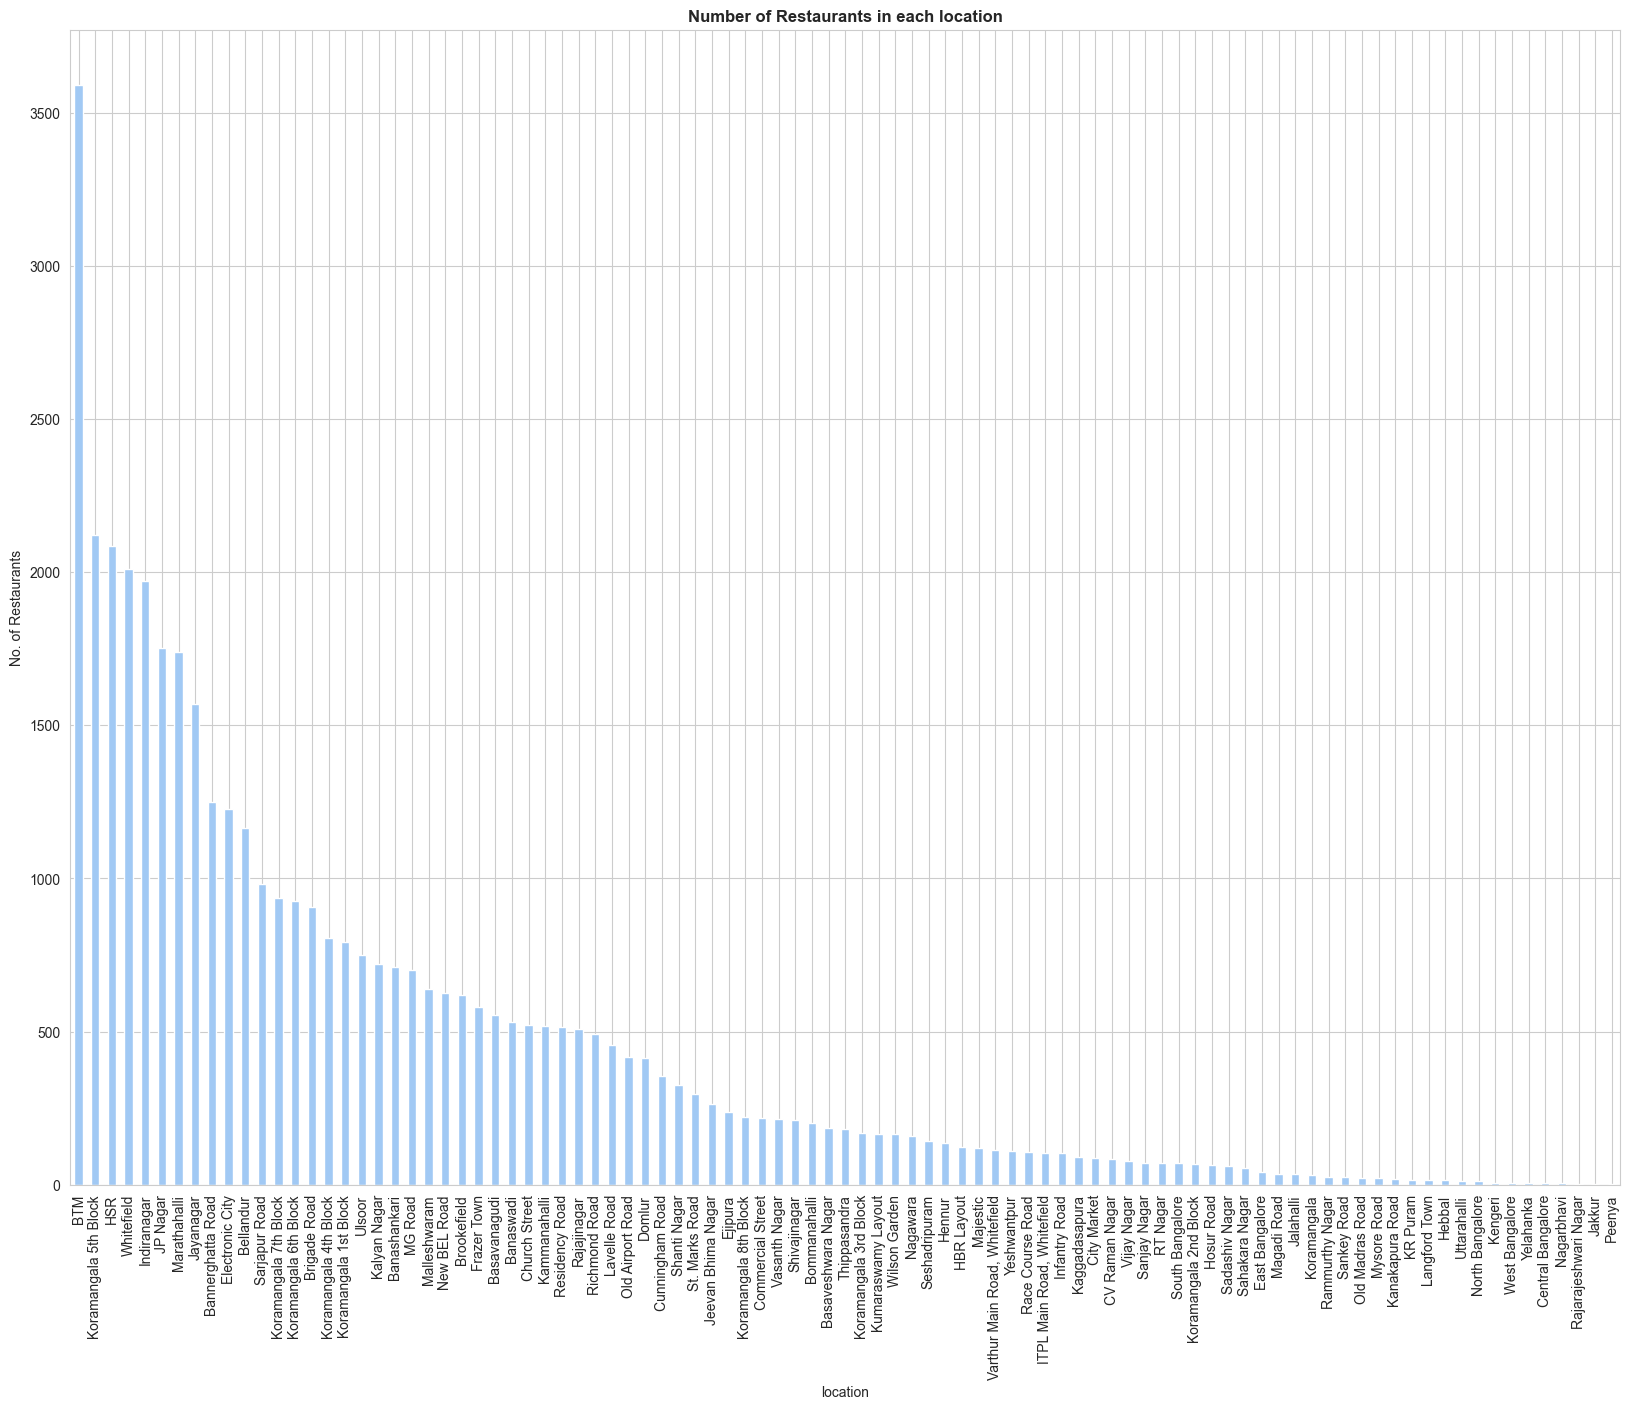

In [108]:
#plotting
plt.figure(figsize=(20,15))
ax =df.location.value_counts().plot(kind='bar')
plt.title('Number of Restaurants in each location', weight='bold')
plt.xlabel('location')
plt.ylabel('No. of Restaurants')
plt.show()

As we can see there are total 92 different locations in Bangalore.






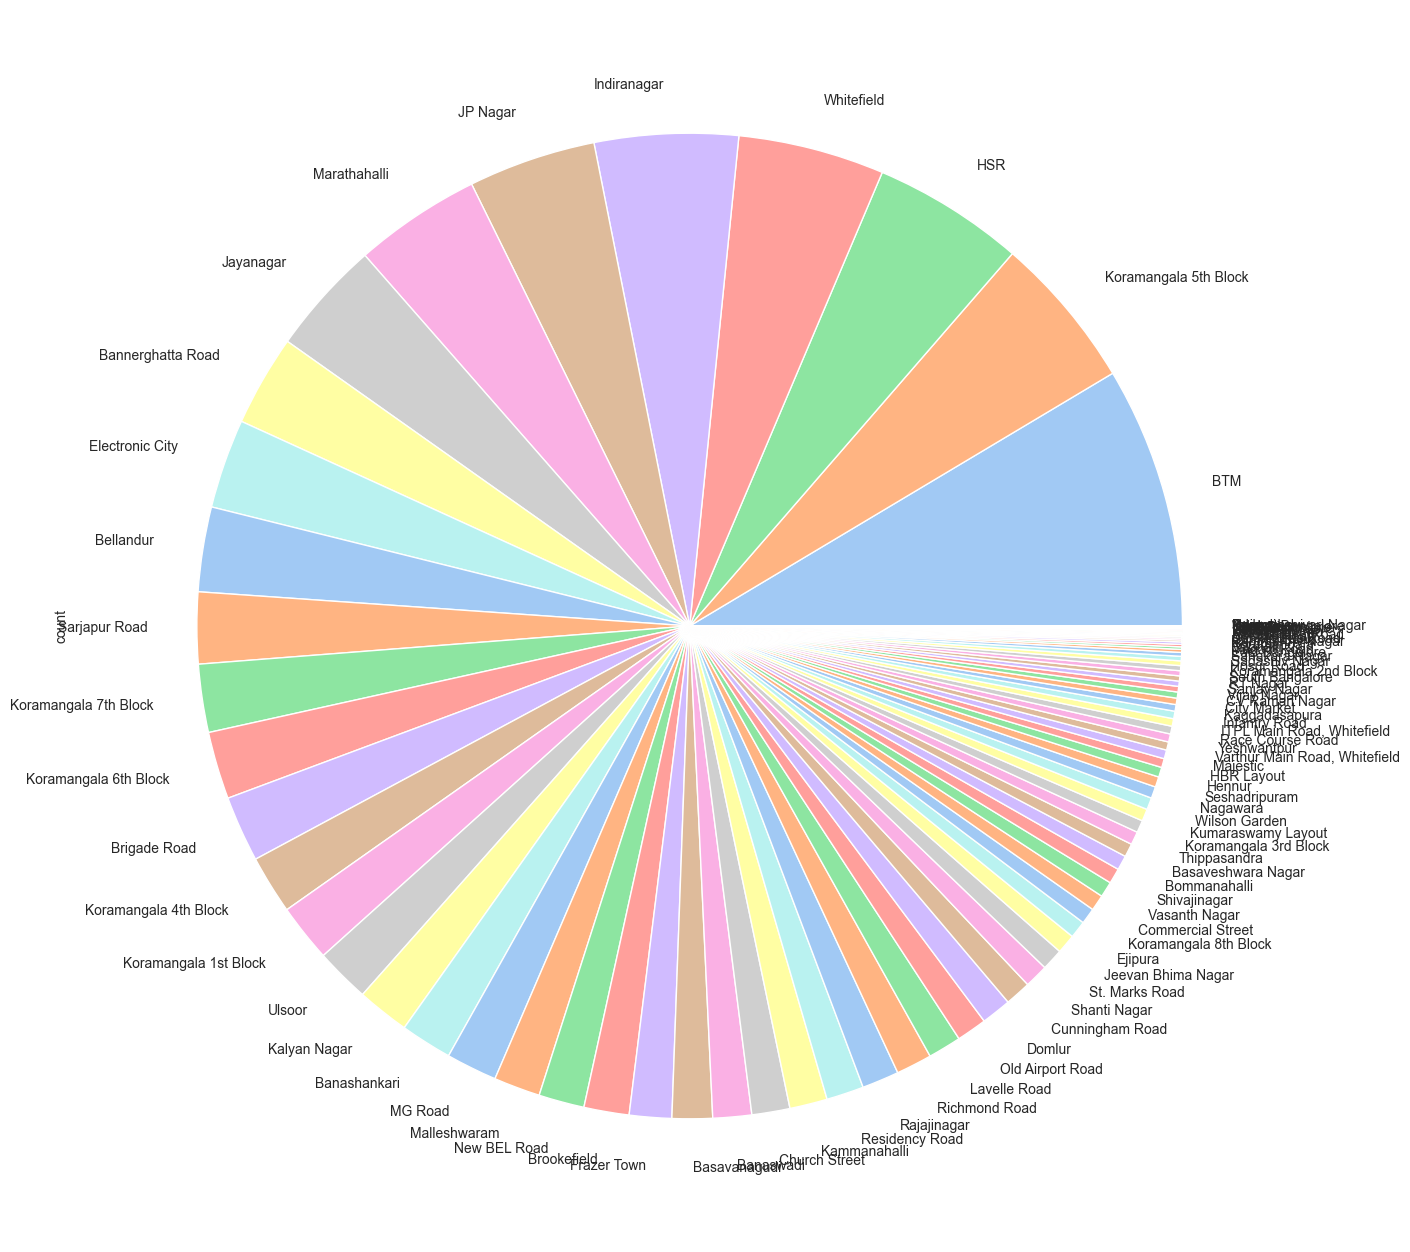

In [110]:
#plotting pie chart
plt.figure(figsize=(20,16))
ax=df.location.value_counts().plot(kind='pie')
plt.show()

Its very complicated to understand so we will limit ourself to TOP 10 locations

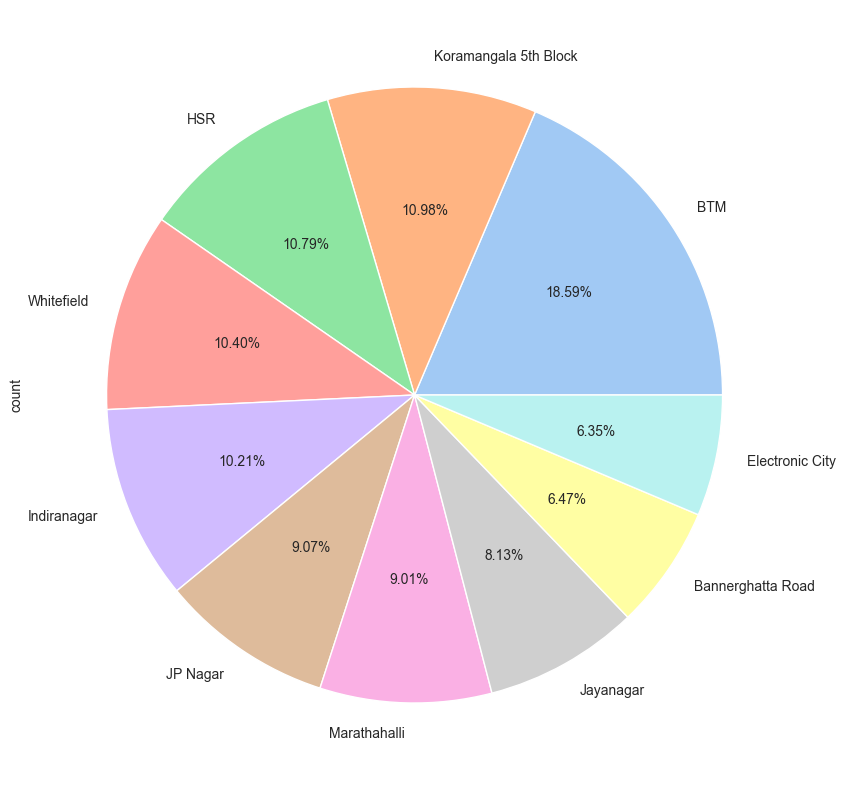

In [111]:
plt.figure(figsize=(15,10))
ax=df.location.value_counts()[:10].plot(kind='pie',autopct='%1.2f%%')
plt.show()

We can see that most of the restaurants are located at the BTM location 

What type of restaurants are there in Bangalore?

Text(0, 0.5, 'counts')

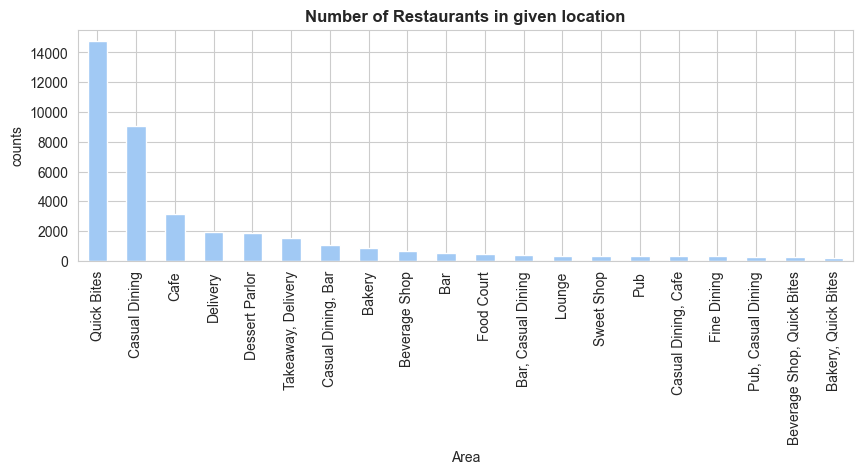

In [112]:
plt.figure(figsize=(10,3))
ax =df.rest_type.value_counts()[:20].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

Mostly 'Quick Byte' restaurants are present

Lets see 'Rate' vs 'Restaurant type' graph.

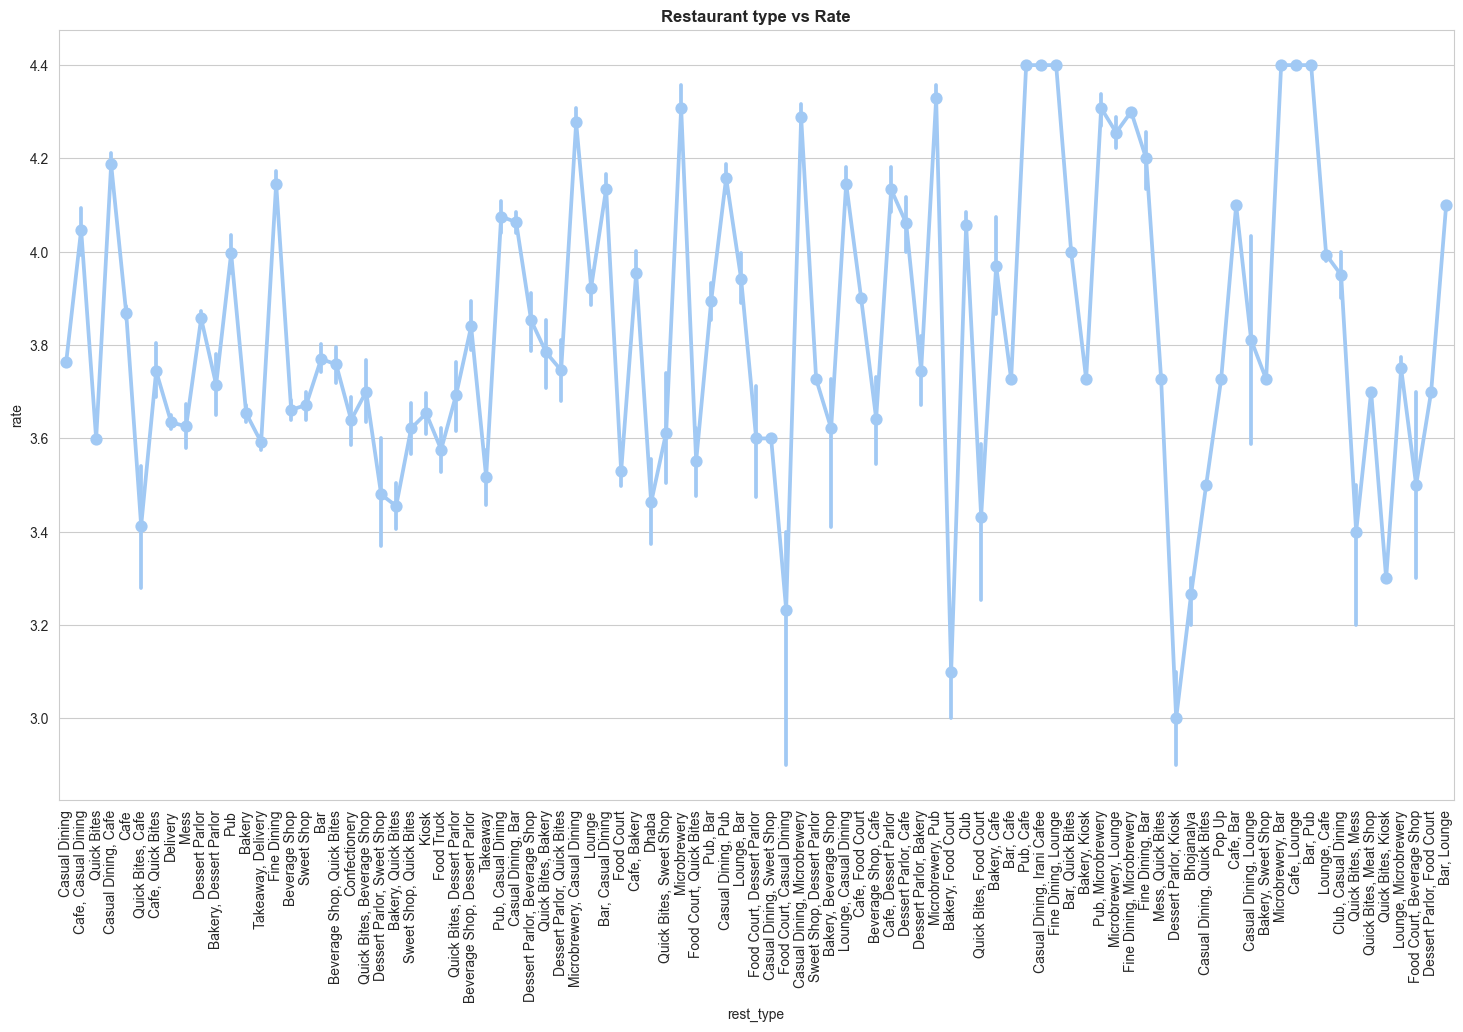

In [113]:
f,ax=plt.subplots(figsize=(18,10))
g=sns.pointplot(y='rate',x='rest_type',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Restaurant type vs Rate', weight = 'bold')
plt.show()

 Lets plot 'Rate' vs 'Online order'

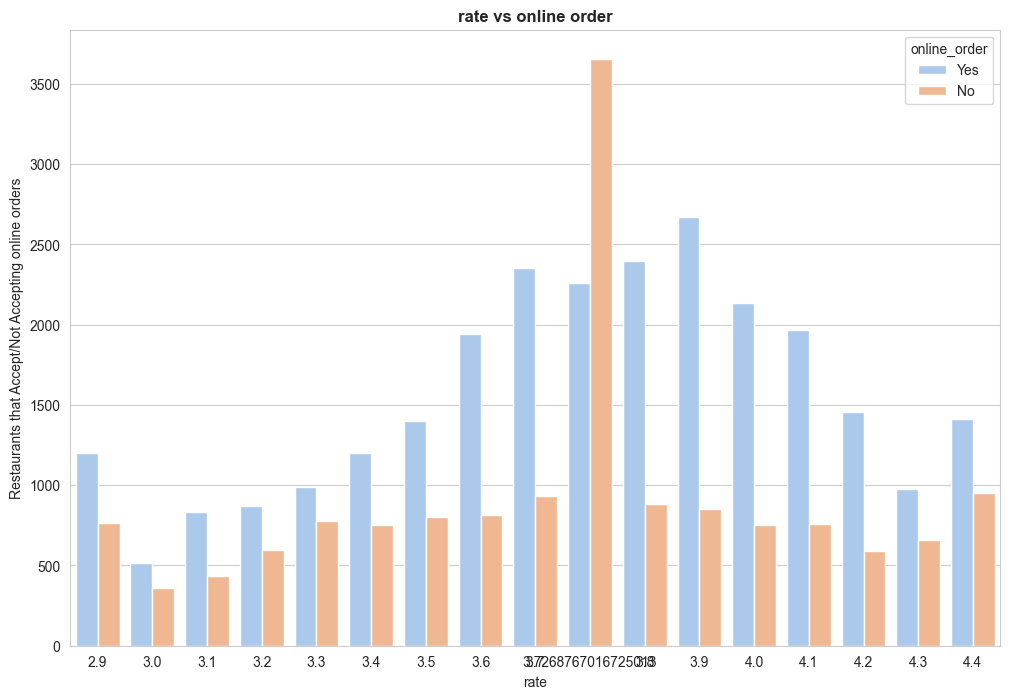

In [114]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x='rate',data=df,hue='online_order')
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs online order",weight = 'bold')
plt.show()

Top 10 Cuisines

In [115]:
from collections import Counter
cuisines=[j.lower().strip() for i in df.cuisines for j in i.split(',')]
c1=Counter(cuisines)
c1.most_common(10)


[('north indian', 17415),
 ('chinese', 12744),
 ('south indian', 6650),
 ('fast food', 6442),
 ('biryani', 5253),
 ('continental', 5116),
 ('desserts', 4630),
 ('cafe', 4543),
 ('beverages', 3975),
 ('italian', 3049)]

Text(0, 0.5, 'No of restaurants')

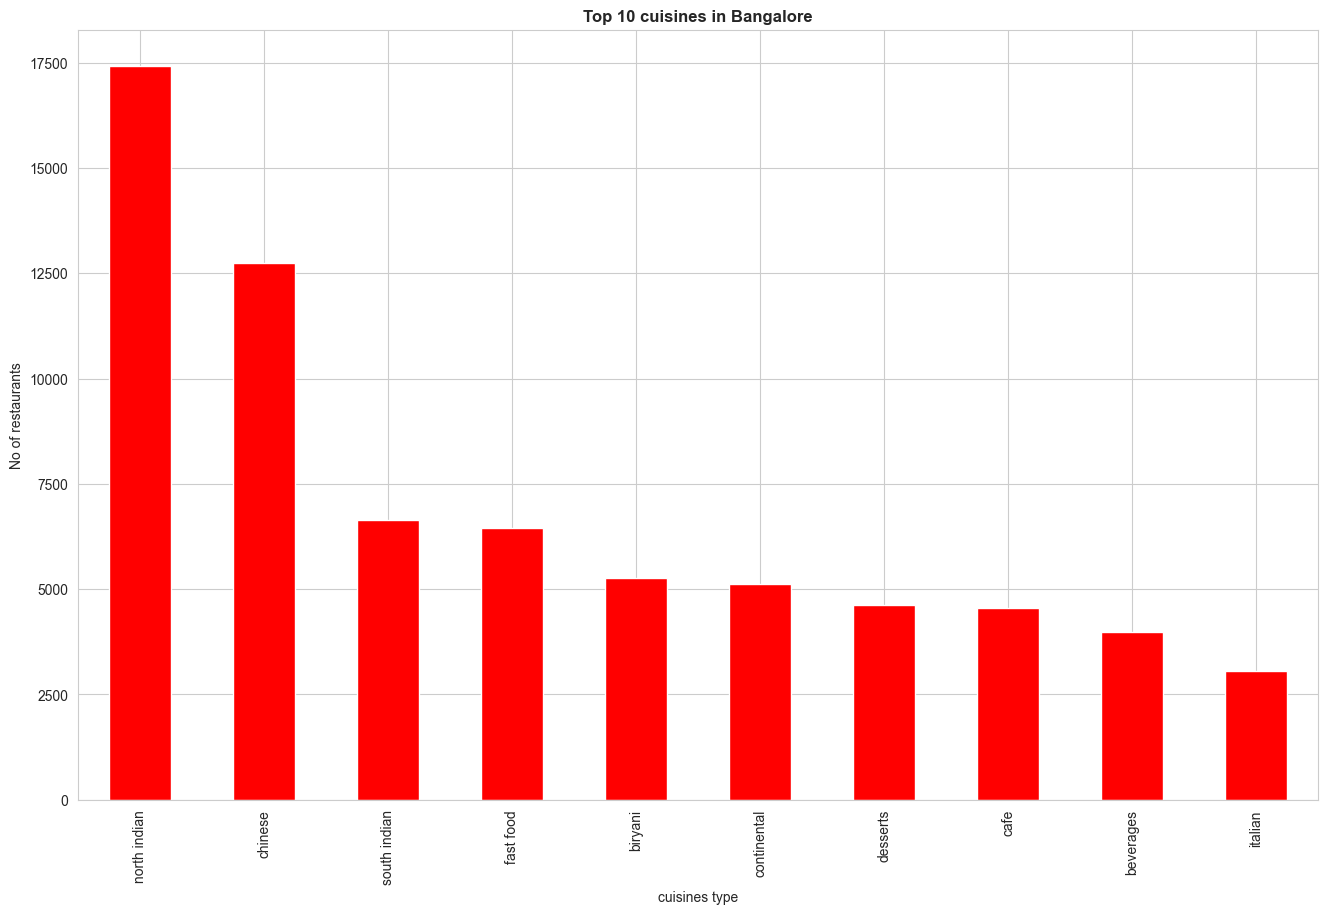

In [116]:
plt.figure(figsize=(16,10))
pd.Series(cuisines).value_counts()[:10].plot(kind='bar',color='r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

North Indian food is at top, followed by chinese and so on.

In [117]:
df.reset_index(drop = True , inplace = True)

**Encoding**

In [118]:
#Encoding
from sklearn.preprocessing import MultiLabelBinarizer 

Mlb = MultiLabelBinarizer()

In [119]:
df["cuisines_temp"] = df["cuisines"].apply(lambda r : r.replace(", ", ",").split(",")) 
df["cuisines_temp"]

0                [North Indian, Mughlai, Chinese]
1                   [Chinese, North Indian, Thai]
2                        [Cafe, Mexican, Italian]
3                    [South Indian, North Indian]
4                      [North Indian, Rajasthani]
                           ...                   
41903                               [Continental]
41904                               [Finger Food]
41905                               [Finger Food]
41906                               [Finger Food]
41907    [Finger Food, North Indian, Continental]
Name: cuisines_temp, Length: 41908, dtype: object

In [120]:
df_cuisines=pd.DataFrame(Mlb.fit_transform(df["cuisines_temp"]) , columns= Mlb.classes_)
df_cuisines

,Afghan,Afghani,African,American,Andhra,Arabian,Asian,Assamese,Australian,Awadhi,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df['rest_type'] = df['rest_type'].apply(lambda x: x.lower())
df['rest_type_count'] = df['rest_type'].apply(lambda x: len(x.split(', ')))

In [122]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'type', 'Target', 'cuisines_temp',
       'rest_type_count'],
      dtype='object')

In [123]:
one_hot=df[['location','type']]
df_dummies=pd.get_dummies(one_hot,drop_first=True)
df_dummies=df_dummies.astype(int)
df_dummies

,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,location_Brigade Road,location_Brookefield,location_CV Raman Nagar,...,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41903,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
41904,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
41905,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
41906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
#Converting to numerical
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['online_order']=label.fit_transform(df['online_order'])
df['book_table']=label.fit_transform(df['book_table'])
df.reset_index(drop = True , inplace = True)

In [125]:
df.drop(['rate','cuisines',"cuisines_temp", 'rest_type','type','location'], axis=1, inplace=True)

In [126]:
df=pd.concat([df,df_cuisines,df_dummies],axis=1)
df.head()

,online_order,book_table,votes,cost,Target,rest_type_count,Afghan,Afghani,African,American,...,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,1,1,775.0,800.0,Good,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,787.0,800.0,Good,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,918.0,800.0,Good,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,88.0,300.0,Bad,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,166.0,600.0,Good,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df.reset_index(drop = True , inplace = True)

**FEATURE SELECTON**

In [128]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Split the dataframe into features (X) and target (y)
X = df.drop(columns=['Target'])  # Replace 'target_column' with your target column name
y = df['Target']

# Perform feature selection using SelectKBest with mutual information
k_best = 20  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Map selected feature indices back to feature names
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['online_order', 'book_table', 'votes', 'cost', 'rest_type_count',
       'American', 'Asian', 'Cafe', 'Continental', 'European', 'Italian',
       'Juices', 'Mediterranean', 'North Indian', 'Salad', 'South Indian',
       'location_KR Puram', 'location_Koramangala 5th Block',
       'location_Lavelle Road', 'type_Delivery'],
      dtype='object')


In [129]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
df1 = pd.concat([X_selected_df, pd.Series(y, name='Target')], axis=1)

**MODEL CREATION AND EVALUATION**

In [130]:
x =df1.drop("Target", axis=1).values
y =df1["Target"].values

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [132]:
#Normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.75140986, -0.41251707, -0.43591651, ..., -0.23197687,
        -0.10435237,  1.00577773],
       [ 0.75140986, -0.41251707, -0.44967557, ..., -0.23197687,
        -0.10435237,  1.00577773],
       [ 0.75140986, -0.41251707, -0.5666276 , ..., -0.23197687,
        -0.10435237,  1.00577773],
       ...,
       [-1.33083162, -0.41251707,  0.54556329, ..., -0.23197687,
        -0.10435237, -0.99425546],
       [-1.33083162, -0.41251707, -0.36024166, ..., -0.23197687,
        -0.10435237, -0.99425546],
       [ 0.75140986, -0.41251707, -0.48407322, ..., -0.23197687,
        -0.10435237,  1.00577773]])

In [133]:
#KNN Classifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred_knn)
print("accuracy_score of KNN classifier is:",score_knn)
print("classification_report is given by:")
print("*************************")
print(classification_report(y_test,y_pred_knn))

accuracy_score of KNN classifier is: 0.849439274636125
classification_report is given by:
*************************
              precision    recall  f1-score   support

         Bad       0.86      0.88      0.87      7038
        Good       0.84      0.82      0.83      5535

    accuracy                           0.85     12573
   macro avg       0.85      0.85      0.85     12573
weighted avg       0.85      0.85      0.85     12573



array([[6165, 1020],
       [ 873, 4515]], dtype=int64)

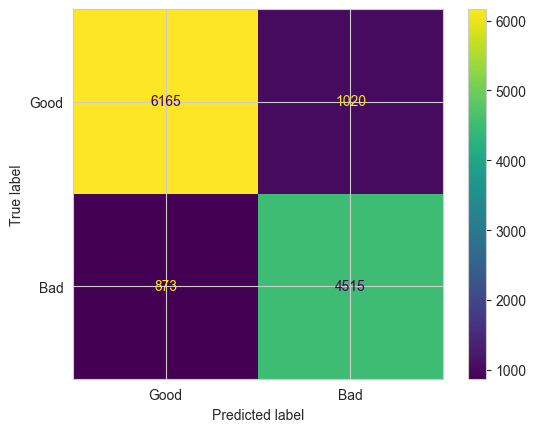

In [134]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
label=["Good","Bad"]   # Y TRAIN FORMAT
mat=confusion_matrix(y_pred_knn,y_test)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
mat

In [135]:
#Support Vector Classifier
model=SVC()
model.fit(x_train,y_train)
y_pred_svm=model.predict(x_test)
score_svm=accuracy_score(y_test,y_pred_svm)
print("accuracy_score of svm classifier is:",score_svm)
print("classification_report is given by:")
print("*************************")
print(classification_report(y_test,y_pred_svm))

accuracy_score of svm classifier is: 0.8212041676608606
classification_report is given by:
*************************
              precision    recall  f1-score   support

         Bad       0.80      0.91      0.85      7038
        Good       0.86      0.71      0.78      5535

    accuracy                           0.82     12573
   macro avg       0.83      0.81      0.81     12573
weighted avg       0.83      0.82      0.82     12573



array([[6411, 1621],
       [ 627, 3914]], dtype=int64)

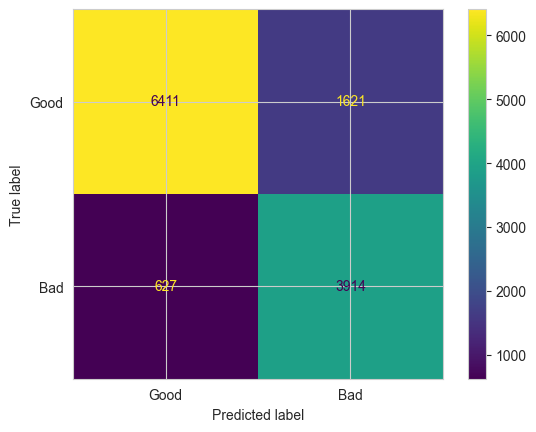

In [136]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
label=["Good","Bad"]   
mat=confusion_matrix(y_pred_svm,y_test)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
mat

In [137]:
#Decision Tree Classifier
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
y_pred_tree=tree.predict(x_test)
score_tree=accuracy_score(y_test,y_pred_tree)
print("accuracy_score of DT classifier is:",score_tree)
print("classification_report is given by:")
print("*************************")
print(classification_report(y_test,y_pred_tree))


accuracy_score of DT classifier is: 0.9261115087886741
classification_report is given by:
*************************
              precision    recall  f1-score   support

         Bad       0.93      0.94      0.93      7038
        Good       0.93      0.90      0.91      5535

    accuracy                           0.93     12573
   macro avg       0.93      0.92      0.92     12573
weighted avg       0.93      0.93      0.93     12573



array([[6644,  535],
       [ 394, 5000]], dtype=int64)

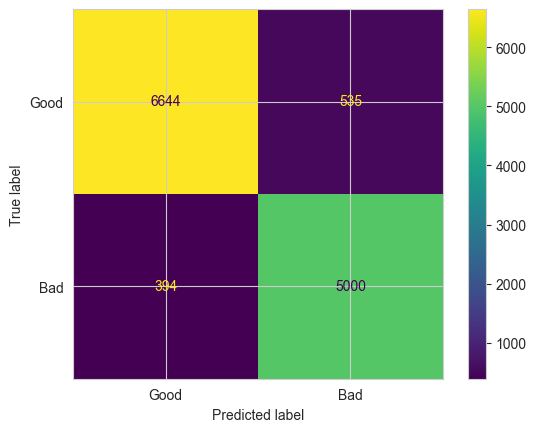

In [138]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
label=["Good","Bad"]   
mat=confusion_matrix(y_pred_tree,y_test)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
mat

In [139]:
Algorithms = [ 'KNN Classifier',"SVM Classifier", 'Desicion Tree Classifier']
accuracy = [score_knn,score_svm,score_tree]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,KNN Classifier,0.849439
1,SVM Classifier,0.821204
2,Desicion Tree Classifier,0.926112


Based on the provided evaluation metrics and confusion matrices for the KNN, SVM, and Decision Tree classifiers, we can draw the following conclusions:
* The Decision Tree classifier outperforms both the KNN and SVM classifiers in terms of accuracy, precision, recall, and F1-score.
* The Decision Tree classifier achieves an accuracy of approximately 92.6%, indicating its effectiveness in correctly classifying instances into their respective classes.
* The KNN classifier achieves an accuracy of approximately 84.9%, followed by the SVM classifier with an accuracy of approximately 82.1%.
* The confusion matrices provide insights into the classifiers' strengths and weaknesses in correctly classifying instances into their respective classes.
* The Decision Tree classifier has fewer misclassifications compared to the KNN and SVM classifiers, as indicated by the smaller off-diagonal values in its confusion matrix.


In summary, the Decision Tree classifier emerges as the most suitable choice among the evaluated classifiers for the project, considering its high accuracy and robust performance in classifying instances into their respective classes.